In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read the csv file

df_1= pd.read_csv('Amazon - Movies and TV Ratings.csv')
df_1.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# melt the dataframe
df = df_1.melt(id_vars=['user_id']).dropna()

In [4]:
# See the dataframe
df = df.rename(columns={"variable": "movie_id", "value": "Rating"})
df.columns

Index(['user_id', 'movie_id', 'Rating'], dtype='object')

In [5]:
# Which movies have maximum views/ratings?
grouped = df.groupby(['movie_id'])['Rating'].count().reset_index()
grouped.sort_values('Rating', ascending=False).head()

,movie_id,Rating
31,Movie127,2313
46,Movie140,578
67,Movie16,320
5,Movie103,272
128,Movie29,243


In [6]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
df.groupby(['movie_id'])['Rating'].mean().reset_index()

,movie_id,Rating
0,Movie1,5.000000
1,Movie10,5.000000
2,Movie100,4.000000
3,Movie101,5.000000
4,Movie102,4.000000
5,Movie103,4.562500
6,Movie104,4.500000
7,Movie105,5.000000
8,Movie106,5.000000
9,Movie107,4.000000


In [7]:
# Define the top 5 movies with the maximum ratings.
grouped_1 = df.groupby(['movie_id'])['Rating'].mean().reset_index()
grouped_1.sort_values('Rating', ascending=False).head()

,movie_id,Rating
0,Movie1,5.0
159,Movie57,5.0
96,Movie186,5.0
93,Movie183,5.0
91,Movie181,5.0


In [8]:
# Define the top 5 movies with the least audience.
grouped_1 = df.groupby(['movie_id'])['Rating'].count().reset_index()
grouped_1.sort_values('Rating', ascending=False).tail()

,movie_id,Rating
138,Movie38,1
137,Movie37,1
136,Movie36,1
135,Movie35,1
0,Movie1,1


# Recommendation Model_ KNN

In [9]:
# Print unique users and unique movies in te dataset
n_users = df.user_id.unique().shape[0]
n_movies = df.movie_id.unique().shape[0]
print(n_users,n_movies)

4848 206


In [10]:
### Standardization
df['Rating'] = df['Rating'] - 3

In [11]:
# From sklearn import cosine

from sklearn.metrics.pairwise import cosine_similarity

dfUU = pd.pivot_table(df,values = 'Rating', index = 'user_id', columns='movie_id')
dfUU = dfUU.iloc[:,np.arange(dfUU.shape[1])[dfUU.isna().sum() < 4848]]

# Replace the NA with 0
dfUU = dfUU.fillna(0)

# Put the data in cosine_similarity
cosineUU = cosine_similarity(dfUU)

# Fill the diagonal values with 0

np.fill_diagonal(cosineUU,0)


similarityUU = pd.DataFrame(cosineUU, index = dfUU.index)
similarityUU.columns= dfUU.index

# Print the dataframe shape
print(similarityUU.shape)

#Print the first rows of the dataframe
similarityUU.head()

(4848, 4848)


user_id,A0047322388NOTO4N8SKD,A00473363TJ8YSZ3YAGG9,A1004AX2J2HXGL,A100CQXJ6D44T9,A100Z2S0880G9A,A1027BL79BSP5P,A102Z4PIK7CYD8,A10367AR7BPFG2,A103HNKB9YAN6P,A103KNDW8GN92L,...,AZNADO488RR7H,AZPCHLL1GHUXU,AZQLDLVVX9PE,AZR2EXV14JPHN,AZSL7FA9NWYX0,AZT7WWYF4YVJA,AZVER2EPLYDZ9,AZY4RYP9948K9,AZYJ9TS07B02W,AZZ1KF8RAO1BR
user_id,,,,,,,,,,,,,,,,,,,,,
A0047322388NOTO4N8SKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
A1004AX2J2HXGL,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
A100CQXJ6D44T9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100Z2S0880G9A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.281e+03,
        0.000e+00, 2.000e+00, 6.000e+00, 5.470e+02]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

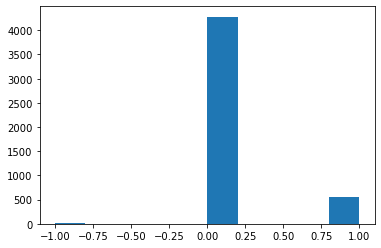

In [12]:
# Plot the histogram
plt.hist(similarityUU.iloc[:,800])

In [13]:
## find 20 similarities to user 124
sim20 = similarityUU.iloc[:,124].sort_values(ascending = False)[:20]
sim20

user_id
A0047322388NOTO4N8SKD    1.0
A1SLALL6WEV7F            1.0
A1SGLQX1NM3OQN           1.0
A260RKDEAMTZW7           1.0
A2HKLAI59V2P1N           1.0
ALAQBPETW2AZJ            1.0
AL4LIFYL4K2FR            1.0
A2656PRL8R8WVH           1.0
A4BMXCTZY6QUH            1.0
AKYFCGC0RHM8Q            1.0
A1CYC0V53CRM6T           1.0
A336YPZ8OLHX5Z           1.0
A33B6DD88Y07M8           1.0
A4CRQC07II41G            1.0
A4F5E6CDHEFU             1.0
A3GWP4VSZNFUEZ           1.0
A1S40N3GB1NIHV           1.0
A1D9BIL79OJSZM           1.0
A1DAI1ZS5XVKK3           1.0
A1SJ6F5GT9QDVK           1.0
Name: A13BR35JUJUPW6, dtype: float64

In [14]:
## Movie Similarity

dfMM = pd.pivot_table(df,values = 'Rating', index = 'movie_id', columns='user_id')

In [15]:
# shape of the dfMM

dfMM.shape

(206, 4848)

# SVM

In [16]:
# Import the libraries

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [17]:
reader = Reader()
data = Dataset.load_from_df(df.iloc[:,:3], reader = reader)
data

In [18]:
# Split the data into train data nad test data
train, test = train_test_split(data, test_size=0.25)

In [19]:
# Accuracy of the SVM
recommender = SVD()
recommender.fit(train)
prediction = recommender.test(test)
accuracy.rmse(prediction)

RMSE: 1.1301


1.1300856864747213

In [20]:
# Test set data
test

[('A3VT62AP8KEK3V', 'Movie16', 1.0),
 ('A1XU2VGHMZEHG4', 'Movie127', 1.0),
 ('AOMG19J5Z49KG', 'Movie127', 0.0),
 ('A3D1Z1V1XLWQD9', 'Movie127', 2.0),
 ('A1EAMAQ8BSI0LY', 'Movie127', 2.0),
 ('A1S077H04GRLRX', 'Movie127', 2.0),
 ('A347B5PO4URX8A', 'Movie127', 1.0),
 ('A2AE038MVX43W9', 'Movie108', 2.0),
 ('ASJZBETYOYS0', 'Movie161', 2.0),
 ('A1WN7Y941KA2SS', 'Movie127', 2.0),
 ('A33TQO18Q5S922', 'Movie127', 2.0),
 ('AUFK6UT2DU87H', 'Movie29', 2.0),
 ('A3AINDWOBZX4DE', 'Movie16', 1.0),
 ('AG88H0POV8BAA', 'Movie103', 1.0),
 ('A2I4DK1N8ZLY32', 'Movie107', 1.0),
 ('AX5X013D2Q9Y2', 'Movie127', 2.0),
 ('A292NDEAXUNW62', 'Movie26', 1.0),
 ('A3OBYFTSJ72YUY', 'Movie16', 1.0),
 ('ARLKYF9JL3QKB', 'Movie127', 1.0),
 ('ARZ75N2I8GEGP', 'Movie127', 2.0),
 ('A22F6WEVKDYJ0O', 'Movie114', 2.0),
 ('AOOQPME039Y8Q', 'Movie140', 2.0),
 ('AAJ3ECB0R49UX', 'Movie89', 2.0),
 ('ADES8B01WRPI3', 'Movie29', 2.0),
 ('A31SPQFIBA0AYL', 'Movie200', 2.0),
 ('A1JC2XJK39VM5E', 'Movie127', 2.0),
 ('A39VJRIW7HC5C0', 'Movie127'

In [21]:
# Make predictions on the test data
recommender.predict(test[12][0],test[12][1],test[12][2], verbose=True)

user: A3AINDWOBZX4DE item: Movie16    r_ui = 1.00   est = 1.56   {'was_impossible': False}


Prediction(uid='A3AINDWOBZX4DE', iid='Movie16', r_ui=1.0, est=1.5626795944934764, details={'was_impossible': False})

In [26]:
test[12]

('A3AINDWOBZX4DE', 'Movie16', 1.0)

In [23]:
# RMSE of the model
recommender = SVD(n_factors= 20)
recommender.fit(train)
prediction = recommender.test(test)
print(accuracy.rmse(prediction))
print(accuracy.mae(prediction))

RMSE: 1.1296
1.1295588718228031
MAE:  0.8168
0.8167981302402202


In [24]:
from surprise.model_selection import cross_validate
cross_validate(recommender, data, measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1262  1.1964  1.1796  1.1822  1.1282  1.1625  0.0294  
MAE (testset)     0.8194  0.8563  0.8504  0.8682  0.8360  0.8461  0.0169  
Fit time          0.19    0.20    0.20    0.21    0.19    0.20    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.12620231, 1.19643992, 1.179599  , 1.18215746, 1.12824228]),
 'test_mae': array([0.81938274, 0.8562586 , 0.85044378, 0.86820088, 0.83600742]),
 'fit_time': (0.1949465274810791,
  0.19652271270751953,
  0.1975255012512207,
  0.20505213737487793,
  0.18950653076171875),
 'test_time': (0.008824348449707031,
  0.010026693344116211,
  0.01002645492553711,
  0.010026693344116211,
  0.010026931762695312)}